<a href="https://colab.research.google.com/github/arthur-craveiro/ProjectsXPe/blob/main/1_Linear_Regression_test_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as Biblitoecas



In [ ]:
# Biblioteca para fazer manipulação de data-frames
import pandas as pd

# Biblioteca para visualização gráfica
import plotly.express as px

# Biblioteca para análises gráfica
import seaborn as sns

# Biblioteca para funções matemáticas de alto nível
import numpy as np

# Biblioteca para métricas de avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Coletando Dados

In [ ]:
# Clicar no arquivo de custo_diaria.csv > ... > copiar caminho
custo_diaria = pd.read_csv('/content/custo_diaria.csv', sep= ';')
# sep é o separador

## Analisando os dados coletados

In [ ]:
# Visualizando arquivos da base de dados
custo_diaria.head()
# head vê os 5 primeiros valores da base

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [ ]:
# Gerando algumas estatísticas da base de dados
custo_diaria.describe()

# std é desvio padrão

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


In [ ]:
# Verificando se existe algum valor nulo ou ausente -> função isna()
custo_diaria.isna().sum()
# sum() conta a quantidade

qtd_pessoas     0
valor_diaria    0
dtype: int64

In [ ]:
# Verificando informações da base de dados -> Se todas as informações estão adequadas ao seu formato
custo_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   qtd_pessoas   15 non-null     int64
 1   valor_diaria  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


## Analise de correlação entre as variáveis

*   Correlação positiva: quando 2 variáveis que possuem correlação crescrem ou decrescem juntas, ou seja, possuem uma relação direta.
*   Correlação negativa: quando 2 variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa.





In [ ]:
custo_diaria.corr()

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.992069
valor_diaria,0.992069,1.000000


### Analise gráfica da correlação entre as variáveis

<Axes: >

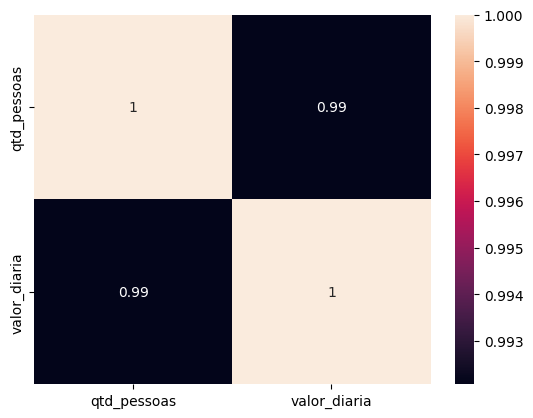

In [ ]:
correlacao = custo_diaria.corr()
sns.heatmap(correlacao, annot=True)

# heatmap é um mapa de calor e annot é para mostrar os valores

## Tratamento de dados

Nesta etapa, vamos preparar os dados para serem utilizados no modelo de Regressão Linear. Esta transformação deve ser realizada para que os dados possam ter o formato que o algoritmo solicita como entrada.

### Criando variável independente - X
Coletamos todos os registros da primeira coluna e convertemos no formato de array

In [ ]:
X = custo_diaria.iloc[:,0].values
print(X)
# Pega todas as linhas da coluna 0

[ 1  4  6 10 13 15 18 22 25 30 40 42 45 47 50]


A função iloc permite seleionar um conjunto de registros. O dois pontos ":" significa que estamos selecionando todos os registros de zero "0", primeira coluna.

### Criando a variável dependente -y (o que queremos predizer)

In [ ]:
y = custo_diaria.iloc[:,1].values
print(y)

[ 150  385  499  680  735  859  989 1075 1500 1850 2000 2089 2250 2488
 2680]


### Verificando tipo de variáveis

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X.shape
#shape, no caso, diz que temos 15 linhas e só

(15,)

### Transformando array em matriz

In [ ]:
X = X.reshape(-1,1)
# Isso significa que não sabemos o número de linhas, mas que haverá somente 1 coluna

In [ ]:
X.shape

(15, 1)

## Criando modelo de Machine Learning - Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
predicao_custo_diaria = LinearRegression()

In [ ]:
type(predicao_custo_diaria)

sklearn.linear_model._base.LinearRegression

## Realizando o Treinamento do modelo

In [ ]:
predicao_custo_diaria.fit(X,y)

LinearRegression()

### Calculando a constante alfa - intercept

In [ ]:
predicao_custo_diaria.intercept_

155.91874556932066

### Calculando o coeficiente angular da reta - coef


In [ ]:
predicao_custo_diaria.coef_

array([48.61472504])

### Realizando a predição dos valores das diárias

Baseado no número de pessoas, vamos estimar/prever o custo do imóvel alugado.

In [ ]:
previsao_valores = predicao_custo_diaria.predict(X)

In [ ]:
#visualização das previsões para cada número de pessoas
previsao_valores

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

## Visualizando no gráfico as disposições dos dados

Para visualizar os dados no gráfico, temos que transformar os valores das variáveis para o formato de vetor. Para isso, utilizamos o comando ravel()



### Gerando visualização gráfica dos dados

In [ ]:
# Gráfico 1
grafico = px.scatter (x = X.ravel(), y=y)
grafico.show()
#ravel transforma de volta de matrix para vetor
#scatter é um gráfico de dispersão

In [ ]:
# Gráfico 2
grafico = px.scatter (x = X.ravel(), y=y)
grafico.add_scatter (x = X.ravel(), y = previsao_valores, name ='Previsões')
grafico.show()

## Calculando o valro da diária de acordo com a Equação Linear
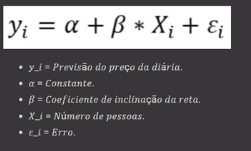

In [ ]:
# Verificando os valores de uma determinada previsão baseada na quantidade de pessoas

alfa = predicao_custo_diaria.intercept_
beta = predicao_custo_diaria.coef_
Xi = 8

alfa + beta * Xi 

array([544.83654593])

## Calculando o valor da diária através da função predict do modelo

In [ ]:
# Verificando de modo direto
predicao_custo_diaria.predict([[8]])

array([544.83654593])

##Avaliação do Modelo

In [ ]:
# Calculando a acurácia do modelo
predicao_custo_diaria.score(X,y)

0.984200996064679

### Calculando o Mean Absolut Error
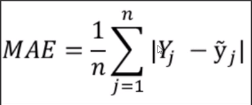

In [ ]:
mean_absolute_error(y, previsao_valores)

83.84480977618742

### Calculando o Mean Squared Error
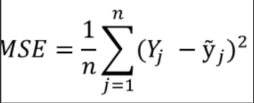



In [ ]:
MSE = mean_squared_error(y, previsao_valores)
print(MSE)

9989.829839426571


### Calculando o Root Mean Squared Error
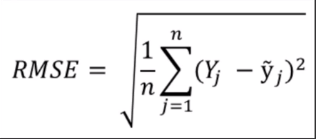

In [ ]:
np.sqrt(MSE)

99.9491362615334